# 0. Loading data

In [1]:
import pandas as pd

## 0.1. Firstly we load the data

In [2]:
df = pd.read_csv("/home/alberto/Documentos/MatchingLearning/Practicas/T2.csv")
list(df)
print(df.shape)

(78646, 245)


/home/alberto/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. Filtering

## 1.1. Filter rows

The first thing we need to do is to convert strings to datetime since we'll filter rows by date.

In [3]:
df['TimeStemp'] = pd.to_datetime(df['TimeStemp'])

Then we can apply a filter by date.

In [4]:
df_3d = df[(df['TimeStemp'] > '2016-04-28 00:00:00') & (df['TimeStemp'] <= '2016-04-30 23:59:59') & (df.index % 2 == 0)]
print(df_3d.shape)

(1740, 245)


## 1.2. Filter columns

We'll get only the MEAN columns

In [5]:
df_3dmean = df_3d.filter(regex='(Orientation|Pressure|Rotation).*_MEAN$', axis=1)
list(df_3dmean)



['Pressure_MEAN',
 'OrientationProbe_azimuth_MEAN',
 'OrientationProbe_pitch_MEAN',
 'OrientationProbe_roll_MEAN',
 'RotationVector_cosThetaOver2_MEAN',
 'RotationVector_xSinThetaOver2_MEAN',
 'RotationVector_ySinThetaOver2_MEAN',
 'RotationVector_zSinThetaOver2_MEAN']

RotationVector_cosThetaOver2_MEAN is a feature with all values as NaN so we'll exclude it.

In [6]:
 df_3dmean = df_3dmean.loc[:, df_3dmean.columns.difference(["RotationVector_cosThetaOver2_MEAN"])]

Drop null values too

In [7]:
df_3dmean = df_3dmean.dropna()
print(df_3dmean.shape)

(1740, 7)


# 2. Principal Component Analysis
## 2.1. Scalation

In [8]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
datanorm = scaler.fit_transform(df_3dmean)

## 2.2. Modelling (PCA)

In [9]:
from sklearn.decomposition import PCA

n_components = 3
estimator = PCA(n_components)
X_pca = estimator.fit_transform(datanorm)

## 2.3. Plotting (PCA)

In [10]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]
ax.scatter(x,y,z)
plt.show()

<Figure size 640x480 with 1 Axes>

# 3. Clustering

## 3.1. Using KMeans

In [11]:
#from sklearn.cluster import KMeans
#from sklearn import metrics

#iterations = 10
#max_iter = 300
#tol = 1e-04 
#random_state = 0
#k = 132
#init = "random"
#km = KMeans(k, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
#labels = km.fit_predict(df_3dmean)

#print(metrics.silhouette_score(df_3dmean, labels))

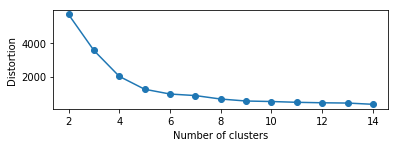

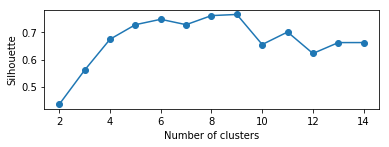

In [12]:
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn import metrics

init = 'random' # initialization method 
iterations = 10 # to run 10 times with different random centroids to choose the final model as the one with the lowest SSE
max_iter = 300 # maximum number of iterations for each single run
tol = 1e-04 # controls the tolerance with regard to the changes in the within-cluster sum-squared-error to declare convergence
random_state = 0 # random


distortions = []
silhouettes = []

for i in range(2, 15):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))
    
# Plot distortions    
plt.subplot(211)
plt.plot(range(2,15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Plot Silhouette
plt.subplot(212)
plt.plot(range(2,15), silhouettes , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

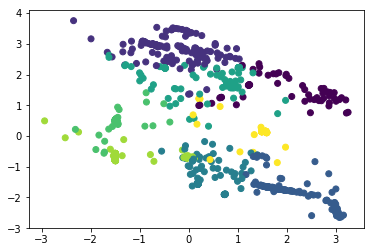

In [18]:
#Clustering execution
k = 8 # from previous pictures but it is not easy to choose
# Random inicialization
centroids, labels, z =  sklearn.cluster.k_means(X_pca, k, init="random")

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x,y, c = labels)

## 3.2. Plotting centroids

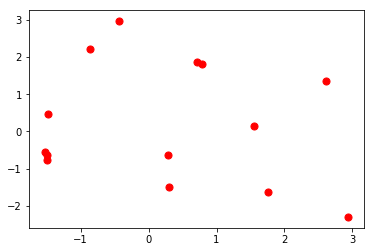

In [20]:
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red',s=50)
plt.show()

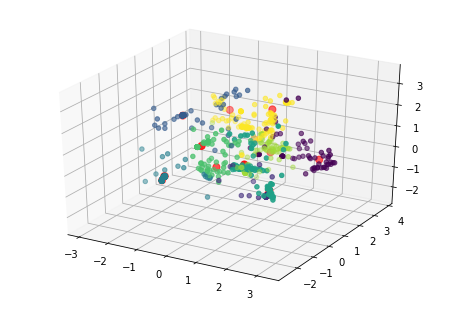

In [16]:
fig = plt.figure()
ax = Axes3D(fig)
x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], c='red',s=50)
ax.scatter(x,y,z, c = labels)
plt.show()